In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [32]:
!python3 -m spacy download en_core_web_sm

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [34]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [35]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [36]:
all_books

[<DirEntry 'B - The Sword of Destiny.txt'>,
 <DirEntry 'C - The Last Wish.txt'>,
 <DirEntry 'E - something ends something begins.txt'>,
 <DirEntry 'I - Blood of Elves.txt'>,
 <DirEntry 'II - Times of Contempt.txt'>,
 <DirEntry 'III - Baptism of Fire.txt'>,
 <DirEntry 'IV - The Tower of the Swallow.txt'>,
 <DirEntry 'V - The Lady of the Lake.txt'>]

In [37]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [38]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load character names

In [39]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [40]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [41]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

## Get named entity list per sentence

In [42]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [43]:
sent_entity_df

sentence  \
0     (ï»¿'Does, she, always, devour, her, victims, ...   
1     (\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...   
2                                             (Pish, !)   
3     (Devours, ,, takes, a, bite, ,, leaves, aside,...   
4     (She, only, bit, the, head, from, one, ,, gutt...   
5     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...   
6     (', Say, what, you, want, about, the, striga, ...   
7     (\n\n, ', Has, anyone, she, 's, attacked, surv...   
8     (The, witcher, asked, ,, apparently, paying, n...   
9     (Segelin, and, Ostrit, looked, at, each, other...   
10                                               (\n\n)   
11           (', Yes, ,, ', said, the, bearded, man, .)   
12    (', At, the, very, beginning, ,, seven, years,...   
13                             (One, escaped-, ', \n\n)   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...   
15                         (You, \n, remember, ., ., .)   
16                                    (?, ', \n\n \n\n)   
17    (IV, \n\n \n\n, The, following, day, ,, late, ...   
18    (He, was, led, in, by, a, soldier, in, a, hood...   
19    (The, conversation, did, not, yield, any, sign...   
20    (The, miller, was, terrified, ;, he, mumbled, ...   
21    (The, striga, could, open, her, \n, jaws, impr...   
22    (Her, claws, were, sharper, than, a, wildcat, ...   
23    (And, \n, it, was, only, because, of, that, th...   
24    (\n\n, Having, finished, his, examination, Ger...   
25    (The, soldier, pushed, the, peasant, through, ...   
26    (It, was, Foltest, himself, ., \n\n, ', Sit, ,...   
27                  (', This, visit, is, unofficial, .)   
28           (Are, you, happy, with, the, interview, ?)   
29    (I, \n, heard, you, were, at, the, palace, thi...   
30    (\n\n, ', Yes, ,, your, Majesty, ., ', \n\n, '...   
31    (\n\n, ', It, is, four, days, until, the, full...   
32    (After, that, ., ', \n\n, ', You, prefer, to, ...   
33    (But, having, had, her, fill, the-, the, princ...   
34    (\n\n, ', Striga, ,, master, witcher, ,, strig...   
35               (Let, us, not, play, at, diplomacy, .)   
36      (She, will, be, a, princess, afterwards, ., \n)   
37    (And, that, is, what, I, have, come, to, talk,...   
38    (Answer, me, unofficially, ,, briefly, and, cl...   
39    (Do, n't, hide, behind, your, code, ., ', \n\n...   
40                                               (\n\n)   
41    (', I, confirm, ,, your, Majesty, ,, that, the...   
42    (And, ,, unless, I, am, mistaken, ,, it, can, ...   
43    (The, third, crowing, of, the, cock, ,, as, lo...   
44    (That, is, what, is, usually, done, with, \n, ...   
45    (\n\n, ', So, simple, ?, ', \n\n, ', It, is, n...   
46       (First, you, have, to, survive, the, night, .)   
47    (Then, there, are, exceptions, to, the, rule, ...   
48                                   (Consecutively, .)   
49       (There, are, also, cases, which, are, ., ., .)   
50                  (well, ., ., ., \n, hopeless, ., ')   
51                                               (\n\n)   
52                    (Yes, ,, ', Foltest, bristled, .)   
53    (', I, keep, hearing, that, from, some, people...   
54    (Kill, the, monster, because, it, 's, an, \n, ...   
55    (Master, witcher, ,, I, \n\n, am, sure, they, ...   
56                                    (Am, I, right, ?)   
57    (Hack, the, man, -, eater, to, death, without,...   
58     (I, wo, n't, pay, ,, but, \n\n\n, they, will, .)   
59                                (Very, convenient, .)   
60                                      (And, cheap, .)   
61    (Because, the, king, will, order, the, witcher...   
62                                (Geralt, grimaced, .)   
63    (\n\n, Foltest, looked, the, Rivian, in, the, ...   
64    (\n\n, ', The, king, does, not, know, ,, ', he...   
65                                                  (')   
66    (But, the, witcher, should, bear, such, an, ev...   
67    (', I, intend, to, do, what, 

In [44]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [45]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [46]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence           entities  \
1    (\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...           [Geralt]   
5    (Damned, mother's-, !, ', \n\n, ', Careful, ,,...  [Velerad, Ostrit]   
6    (', Say, what, you, want, about, the, striga, ...             [Adda]   
9    (Segelin, and, Ostrit, looked, at, each, other...  [Segelin, Ostrit]   
14   (And, then, ,, ', interrupted, Velerad, ,, ', ...  [Velerad, miller]   
24   (\n\n, Having, finished, his, examination, Ger...   [Geralt, miller]   
26   (It, was, Foltest, himself, ., \n\n, ', Sit, ,...          [Foltest]   
52                   (Yes, ,, ', Foltest, bristled, .)          [Foltest]   
62                               (Geralt, grimaced, .)           [Geralt]   
103  (I, do, not, think, it, will, come, to, that, ...           [Geralt]   

    character_entities  
1             [Geralt]  
5    [Velerad, Ostrit]  
6               [Adda]  
9    [Segelin, Ostrit]  
14           [Velerad]  
24            [Geralt]  
26           [Foltest]  
52           [Foltest]  
62            [Geralt]  
103           [Geralt]

In [47]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\afsho\AppData\Local\Temp\ipykernel_21092\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [48]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence           entities  \
1     (\n\n, ', Come, on, ,, Geralt, ,, it, 'll, be,...           [Geralt]   
5     (Damned, mother's-, !, ', \n\n, ', Careful, ,,...  [Velerad, Ostrit]   
6     (', Say, what, you, want, about, the, striga, ...             [Adda]   
9     (Segelin, and, Ostrit, looked, at, each, other...  [Segelin, Ostrit]   
14    (And, then, ,, ', interrupted, Velerad, ,, ', ...  [Velerad, miller]   
...                                                 ...                ...   
8946  (Nenneke, raised, herself, to, her, knees, and...          [Nenneke]   
8953                       (She, turned, to, Geralt, .)           [Geralt]   
8957  (Iola-, ', \n\n, ', Do, n't, say, anything, ,,...          [Nenneke]   
8966                                 (See, to, Iola, .)             [Iola]   
8967                       (So, long, ,, Nenneke, ., ')          [Nenneke]   

     character_entities  
1              [Geralt]  
5     [Velerad, Ostrit]  
6                [Adda]  
9     [Segelin, Ostrit]  
14            [Velerad]  
...                 ...  
8946          [Nenneke]  
8953           [Geralt]  
8957          [Nenneke]  
8966             [Iola]  
8967          [Nenneke]  

[1036 rows x 3 columns]

## Create relationships

In [49]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [50]:
relationship_df = pd.DataFrame(relationships)

In [51]:
pd.set_option('display.max_rows', None)
relationship_df

source       target
0          Geralt      Velerad
1         Velerad       Ostrit
2          Geralt      Velerad
3         Velerad       Ostrit
4          Ostrit         Adda
5         Velerad       Ostrit
6          Ostrit         Adda
7         Velerad       Ostrit
8          Ostrit         Adda
9         Velerad       Ostrit
10         Ostrit         Adda
11           Adda      Segelin
12        Segelin       Ostrit
13        Velerad       Ostrit
14         Ostrit         Adda
15           Adda      Segelin
16        Segelin       Ostrit
17           Adda      Segelin
18        Segelin       Ostrit
19        Segelin       Ostrit
20        Segelin       Ostrit
21        Segelin       Ostrit
22         Ostrit      Velerad
23         Geralt      Foltest
24         Geralt      Foltest
25         Geralt      Foltest
26         Geralt      Foltest
27        Foltest         Adda
28        Foltest         Adda
29        Foltest         Adda
30        Foltest         Adda
31         Ostrit       Geralt
32         Ostrit       Geralt
33         Ostrit       Geralt
34         Ostrit       Geralt
35         Ostrit       Geralt
36         Ostrit       Geralt
37         Ostrit       Geralt
38         Ostrit       Geralt
39         Ostrit       Geralt
40         Geralt       Ostrit
41        Velerad      Segelin
42        Velerad      Segelin
43        Velerad      Segelin
44        Velerad      Segelin
45        Velerad      Segelin
46        Velerad      Segelin
47        Foltest      Velerad
48        Foltest      Velerad
49        Foltest      Velerad
50        Foltest      Velerad
51        Foltest      Velerad
52        Foltest      Velerad
53         Ostrit       Geralt
54         Ostrit       Geralt
55         Ostrit      Foltest
56         Ostrit      Foltest
57         Ostrit      Foltest
58        Velerad       Geralt
59        Velerad       Geralt
60        Velerad       Geralt
61        Velerad       Geralt
62        Velerad       Geralt
63        Velerad       Geralt
64         Geralt      Nenneke
65         Geralt      Nenneke
66         Geralt      Nenneke
67         Geralt      Nenneke
68        Nenneke     Yennefer
69         Geralt      Nenneke
70        Nenneke     Yennefer
71       Yennefer      Nenneke
72         Geralt      Nenneke
73        Nenneke     Yennefer
74       Yennefer      Nenneke
75       Yennefer      Nenneke
76       Yennefer      Nenneke
77       Yennefer      Nenneke
78         Geralt      Nenneke
79         Geralt      Nenneke
80         Geralt      Nenneke
81        Nenneke         Iola
82        Nenneke         Iola
83        Nenneke         Iola
84          Roach       Geralt
85          Roach       Geralt
86          Roach       Geralt
87            Two        Rulle
88            Two        Rulle
89            Two        Rulle
90          Rulle       Geralt
91            Two        Rulle
92          Rulle       Geralt
93          Rulle       Geralt
94          Rulle       Geralt
95          Roach       Geralt
96         Geralt        Roach
97         Geralt        Roach
98         Geralt        Roach
99         Geralt     Nivellen
100        Geralt     Nivellen
101        Geralt     Nivellen
102        Geralt     Nivellen
103        Geralt     Nivellen
104      Nivellen       Geralt
105      Nivellen       Geralt
106      Nivellen       Geralt
107      Nivellen       Geralt
108      Nivellen       Geralt
109      Nivellen       Geralt
110        Geralt        Fenne
111        Geralt        Fenne
112        Geralt        Fenne
113        Geralt        Fenne
114        Geralt        Fenne
115         Fenne     Nivellen
116         Fenne     Nivellen
117         Fenne     Nivellen
118         Fenne     Nivellen
119      Nivellen      Primula
120      Nivellen      Primula
121       Primula       Geralt
122       Primula       Geralt
123       Primula       Geralt
124       Primula       Geralt
125        Geralt      Primula
126        Geralt      Primula
127       Primula       Geralt
128       Pr

In [52]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source      target
0          Geralt     Velerad
1          Ostrit     Velerad
2          Geralt     Velerad
3          Ostrit     Velerad
4            Adda      Ostrit
5          Ostrit     Velerad
6            Adda      Ostrit
7          Ostrit     Velerad
8            Adda      Ostrit
9          Ostrit     Velerad
10           Adda      Ostrit
11           Adda     Segelin
12         Ostrit     Segelin
13         Ostrit     Velerad
14           Adda      Ostrit
15           Adda     Segelin
16         Ostrit     Segelin
17           Adda     Segelin
18         Ostrit     Segelin
19         Ostrit     Segelin
20         Ostrit     Segelin
21         Ostrit     Segelin
22         Ostrit     Velerad
23        Foltest      Geralt
24        Foltest      Geralt
25        Foltest      Geralt
26        Foltest      Geralt
27           Adda     Foltest
28           Adda     Foltest
29           Adda     Foltest
30           Adda     Foltest
31         Geralt      Ostrit
32         Geralt      Ostrit
33         Geralt      Ostrit
34         Geralt      Ostrit
35         Geralt      Ostrit
36         Geralt      Ostrit
37         Geralt      Ostrit
38         Geralt      Ostrit
39         Geralt      Ostrit
40         Geralt      Ostrit
41        Segelin     Velerad
42        Segelin     Velerad
43        Segelin     Velerad
44        Segelin     Velerad
45        Segelin     Velerad
46        Segelin     Velerad
47        Foltest     Velerad
48        Foltest     Velerad
49        Foltest     Velerad
50        Foltest     Velerad
51        Foltest     Velerad
52        Foltest     Velerad
53         Geralt      Ostrit
54         Geralt      Ostrit
55        Foltest      Ostrit
56        Foltest      Ostrit
57        Foltest      Ostrit
58         Geralt     Velerad
59         Geralt     Velerad
60         Geralt     Velerad
61         Geralt     Velerad
62         Geralt     Velerad
63         Geralt     Velerad
64         Geralt     Nenneke
65         Geralt     Nenneke
66         Geralt     Nenneke
67         Geralt     Nenneke
68        Nenneke    Yennefer
69         Geralt     Nenneke
70        Nenneke    Yennefer
71        Nenneke    Yennefer
72         Geralt     Nenneke
73        Nenneke    Yennefer
74        Nenneke    Yennefer
75        Nenneke    Yennefer
76        Nenneke    Yennefer
77        Nenneke    Yennefer
78         Geralt     Nenneke
79         Geralt     Nenneke
80         Geralt     Nenneke
81           Iola     Nenneke
82           Iola     Nenneke
83           Iola     Nenneke
84         Geralt       Roach
85         Geralt       Roach
86         Geralt       Roach
87          Rulle         Two
88          Rulle         Two
89          Rulle         Two
90         Geralt       Rulle
91          Rulle         Two
92         Geralt       Rulle
93         Geralt       Rulle
94         Geralt       Rulle
95         Geralt       Roach
96         Geralt       Roach
97         Geralt       Roach
98         Geralt       Roach
99         Geralt    Nivellen
100        Geralt    Nivellen
101        Geralt    Nivellen
102        Geralt    Nivellen
103        Geralt    Nivellen
104        Geralt    Nivellen
105        Geralt    Nivellen
106        Geralt    Nivellen
107        Geralt    Nivellen
108        Geralt    Nivellen
109        Geralt    Nivellen
110         Fenne      Geralt
111         Fenne      Geralt
112         Fenne      Geralt
113         Fenne      Geralt
114         Fenne      Geralt
115         Fenne    Nivellen
116         Fenne    Nivellen
117         Fenne    Nivellen
118         Fenne    Nivellen
119      Nivellen     Primula
120      Nivellen     Primula
121        Geralt     Primula
122        Geralt     Primula
123        Geralt     Primula
124        Geralt     Primula
125        Geralt     Primula
126        Geralt     Primula
127        Geralt     Primula
128        Geralt     Primula
129        Geralt     Primula
130        Geralt    Nivellen
131        Geralt    Nivellen
132        Geralt    

In [53]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [54]:
relationship_df.head(10)

source   target  value
0   Geralt  Velerad      8
1   Ostrit  Velerad      7
2     Adda   Ostrit      5
3     Adda  Segelin      3
4   Ostrit  Segelin      6
5  Foltest   Geralt      4
6     Adda  Foltest      4
7   Geralt   Ostrit     12
8  Segelin  Velerad      6
9  Foltest  Velerad      6

## Graph analysis and visualization

In [66]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

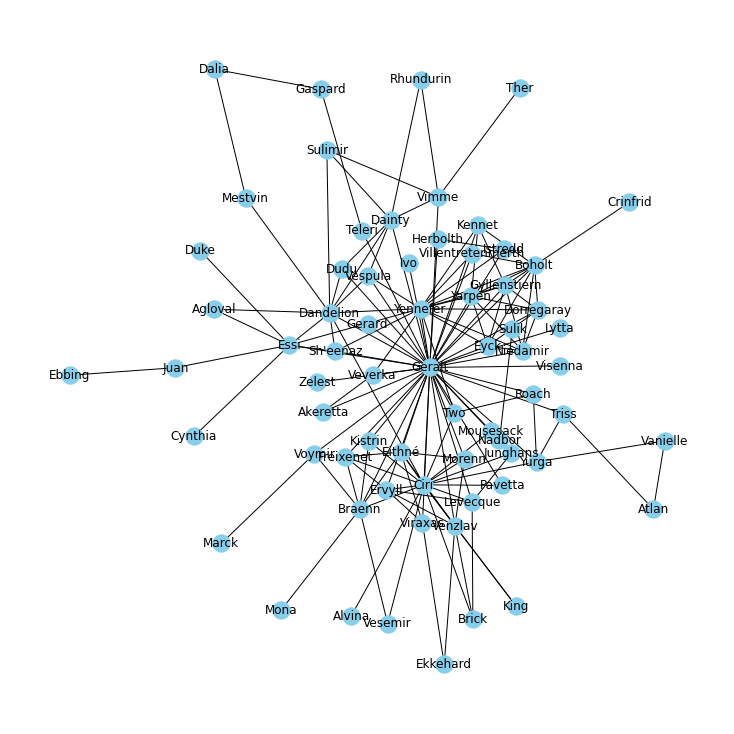

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [72]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

### The most important characters in The Witcher

In [77]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.6567164179104478,
 'Niedamir': 0.1044776119402985,
 'Eyck': 0.1044776119402985,
 'Dorregaray': 0.1044776119402985,
 'Yennefer': 0.23880597014925373,
 'Boholt': 0.14925373134328357,
 'Yarpen': 0.11940298507462686,
 'Gyllenstiern': 0.11940298507462686,
 'Kennet': 0.07462686567164178,
 'Crinfrid': 0.014925373134328358,
 'Villentretenmerth': 0.04477611940298507,
 'Istredd': 0.04477611940298507,
 'Herbolth': 0.029850746268656716,
 'Ivo': 0.014925373134328358,
 'Two': 0.05970149253731343,
 'Dandelion': 0.16417910447761194,
 'Vespula': 0.05970149253731343,
 'Dainty': 0.1044776119402985,
 'Vimme': 0.07462686567164178,
 'Sulimir': 0.04477611940298507,
 'Ther': 0.014925373134328358,
 'Rhundurin': 0.029850746268656716,
 'Dudu': 0.04477611940298507,
 "Sh'eenaz": 0.05970149253731343,
 'Gaspard': 0.029850746268656716,
 'Teleri': 0.029850746268656716,
 'Dalia': 0.029850746268656716,
 'Mestvin': 0.029850746268656716,
 'Essi': 0.11940298507462686,
 'Gerard': 0.014925373134328358,
 'Zelest'

<AxesSubplot:>

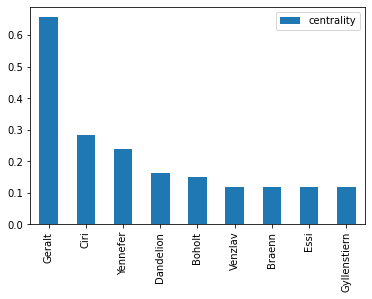

In [78]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

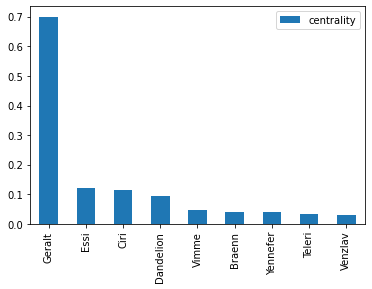

In [79]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

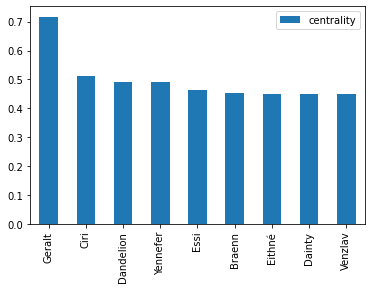

In [80]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [81]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [83]:
import community as community_louvain

In [84]:
communities = community_louvain.best_partition(G)

In [85]:
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Boholt': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 0,
 'Dandelion': 4,
 'Vespula': 4,
 'Dainty': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 4,
 'Gaspard': 6,
 'Teleri': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 4,
 'Gerard': 2,
 'Zelest': 2,
 'Duke': 4,
 'Veverka': 2,
 'Akeretta': 2,
 'Agloval': 4,
 'Ebbing': 4,
 'Juan': 4,
 'Cynthia': 4,
 'Braenn': 3,
 'Ciri': 3,
 'Kistrin': 3,
 'Eithné': 3,
 'Marck': 2,
 'Voymir': 2,
 'Alvina': 3,
 'Vesemir': 3,
 'Ervyll': 3,
 'Freixenet': 3,
 'Venzlav': 3,
 'Ekkehard': 3,
 'Viraxas': 3,
 'Morenn': 3,
 'Mona': 3,
 'Pavetta': 2,
 'Brick': 3,
 'Junghans': 3,
 'Levecque': 3,
 'King': 3,
 'Mousesack': 2,
 'Yurga': 0,
 'Visenna': 2,
 'Triss': 0,
 'Atlan': 0,
 'Vanielle': 0,
 'Lytta': 2,
 'Roach': 0,
 'Nadbor': 5,
 'Sulik': 5}

In [86]:
nx.set_node_attributes(G, communities, 'group')

In [87]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

### Evolution of characters' importance

In [5]:
from lib.utils.functions import *

In [6]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [7]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/2t/5c_z4g5j7z77jprgswwd1htr0000gn/T/ipykernel_74833/4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


<AxesSubplot:>

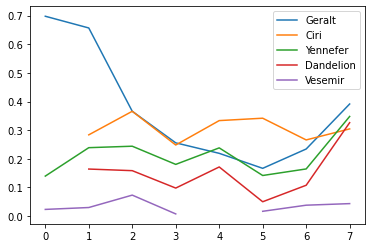

In [8]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()